# Flight Data Analysis - Airbus

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Removals data

### I. Data Set

In [153]:
Removals = pd.read_excel(r'C:\Users\Nghi Truyen\Desktop\Projet_Recherche_5A\Flight_Data_Analysis\INSA-Airbus FHS - Data set_bis.xlsx', sheet_name='Removals')
Removals.info()
Removals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
Customer                         2327 non-null int64
Removal date                     2327 non-null datetime64[ns]
P/N                              2327 non-null object
Description                      2327 non-null object
S/N                              2327 non-null object
Maintenance Type                 2327 non-null object
TSI (Flight Hours) at removal    2237 non-null float64
TSN (Flight Hours) at Removal    2277 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 145.5+ KB


,Customer,Removal date,P/N,Description,S/N,Maintenance Type,TSI (Flight Hours) at removal,TSN (Flight Hours) at Removal
0,3,2015-01-01,C,PN_C,15323054356,Unscheduled,5819.0,5819.0
1,3,2015-01-01,C,PN_C,15323057041,Unscheduled,5819.0,5819.0
2,3,2015-01-03,C,PN_C,15323072973,Unscheduled,3036.0,3036.0
3,3,2015-01-07,C,PN_C,15323053425,Unscheduled,5614.0,5614.0
4,3,2015-01-07,C,PN_C,15323058236,Unscheduled,5614.0,5614.0


In [154]:
Customer = "Customer"
Date = "Removal date"
PN = "P/N"
Descrip = "Description"
SN = "S/N"
Maintenance = "Maintenance Type"
TSI = "TSI (Flight Hours) at removal"
TSN = "TSN (Flight Hours) at Removal"

### II. Data Visualization 

#### 1. Type A, B, C

Number of samples in total :  2327


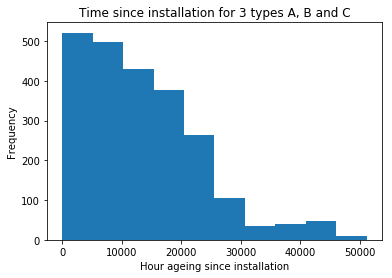

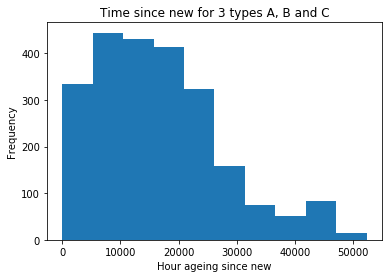

In [155]:
plt.hist(Removals[TSI].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation for 3 types A, B and C')
plt.figure()
plt.hist(Removals[TSN].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new for 3 types A, B and C')

print("Number of samples in total : ", len(Removals[TSI]))

#### 2. Type A

Number of samples type A :  602


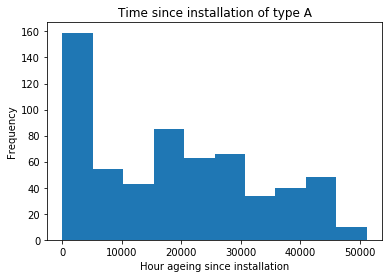

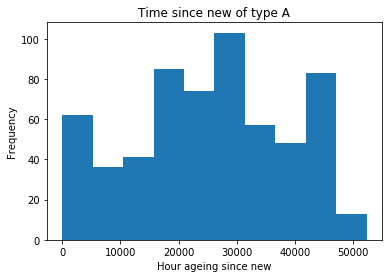

In [156]:
plt.hist(Removals[Removals[PN]=='A'][TSI].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation of type A')
plt.figure()
plt.hist(Removals[Removals[PN]=='A'][TSN].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new of type A')

print("Number of samples type A : ", len(Removals[Removals[PN]=='A'][TSI]))

#### 3. Type B

Number of samples type B :  101


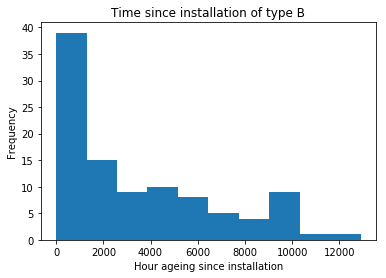

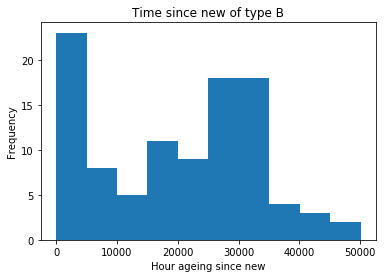

In [157]:
plt.hist(Removals[Removals[PN]=='B'][TSI].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation of type B')
plt.figure()
plt.hist(Removals[Removals[PN]=='B'][TSN].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new of type B')

print("Number of samples type B : ", len(Removals[Removals[PN]=='B'][TSI]))

#### 4. Type C

Number of samples type C :  1624


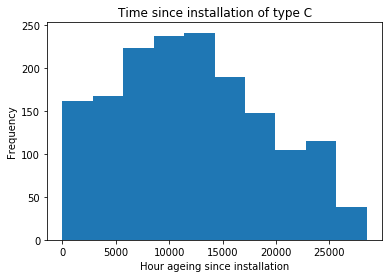

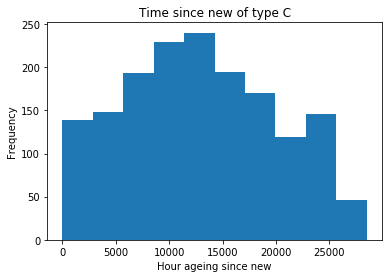

In [158]:
plt.hist(Removals[Removals[PN]=='C'][TSI].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since installation')
plt.title('Time since installation of type C')
plt.figure()
plt.hist(Removals[Removals[PN]=='C'][TSN].replace(np.nan, 0.0),bins=10)
plt.ylabel('Frequency')
plt.xlabel('Hour ageing since new')
plt.title('Time since new of type C')

print("Number of samples type C : ", len(Removals[Removals[PN]=='C'][TSI]))

### III. Data Analysis

##### Exponential distribution for type B data

- Estimating the $\lambda$ coefficient with censoring data :

In [159]:
Removals_B = Removals[Removals[PN]=='B']
Removals_B_TSI = Removals_B[Removals_B[Maintenance] == 'Unscheduled'][TSI] # Censoring data
lamb = len(Removals_B_TSI)/np.sum(Removals[Removals[PN]=='B'][TSI])
print('lambda =', lamb)

lambda = 0.0002804100670567431


- Plotting simulated data :

Text(0.5,1,'Exponential distribution for type B data')

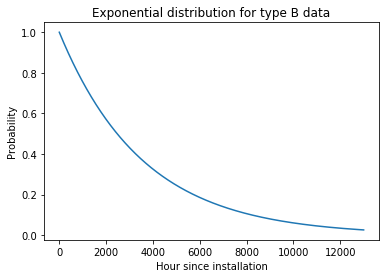

In [160]:
t=np.linspace(0,13000,1000000)
y=pow(np.e,-lamb*t)
plt.plot(t,y)
plt.ylabel('Probability')
plt.xlabel('Hour since installation')
plt.title('Exponential distribution for type B data')

- Mean time to faillure :

In [161]:
print('The average time sine installation of type B :', 1/lamb, 'hours.')

The average time sine installation of type B : 3566.2057731958757 hours.
